In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [57]:
df=pd.read_csv("Data/customer_segmentation_cleaned.csv")

In [58]:
features=["Age", "Income", "Total_Spend", "NumWebPurchases", "NumStorePurchases"]

In [59]:
X=df[features].copy()

In [60]:
X

,Age,Income,Total_Spend,NumWebPurchases,NumStorePurchases
0,69,58138.0,1617,8,4
1,72,46344.0,27,1,2
2,61,71613.0,776,8,10
3,42,26646.0,53,2,4
4,45,58293.0,422,5,6
...,...,...,...,...,...
2211,59,61223.0,1341,9,4
2212,80,64014.0,444,8,5
2213,45,56981.0,1241,2,13
2214,70,69245.0,843,6,10


#### Scaling

In [61]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [62]:
X_scaled= scaler.fit_transform(X)

#### KMeans Clustering
First we select the number of clusters (say k). Then we randomly initialized k cluster centroids (initial centers of the clusters). After that, we assign each data point to the nearest cluster centroid based on a distance metric. We recompute the centroid of each cluster by taking the mean of all data points assigned to it. Repeat the assignment and update steps until: the centroids no longer change or maximum number of iterations is reached.

### Elbow method to determine the best number of clusters

Elbow method aims to find a balance between minimizing inertia (sum of squared distance of points to their nearest cluster center) and avoiding overfitting with too many clusters.

Silhouette score measures how well data points fit within their assigned clusters and how distinct they are from other clusters.

In [63]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
max_range = 9
inertia = []
for k in range(2, max_range):
    kmeans = KMeans(n_clusters=k, init='k-means++', algorithm='elkan',n_init=10, random_state=42)
    model = kmeans.fit(X_scaled)
    print(f"Silhouette Score for K = {k}:  {silhouette_score(X_scaled, model.labels_)}")
    inertia.append(kmeans.inertia_)

Silhouette Score for K = 2:  0.40454346989634765
Silhouette Score for K = 3:  0.3390088281579382
Silhouette Score for K = 4:  0.2595507314539344
Silhouette Score for K = 5:  0.2689726482078431
Silhouette Score for K = 6:  0.27121640319260315
Silhouette Score for K = 7:  0.27531022267058297
Silhouette Score for K = 8:  0.28051593691882176


In [64]:
inertia

[6329.221783034906,
 5451.90424630221,
 4792.948805979457,
 4268.987940717708,
 3710.910030859833,
 3386.143615709968,
 3082.233404629472]

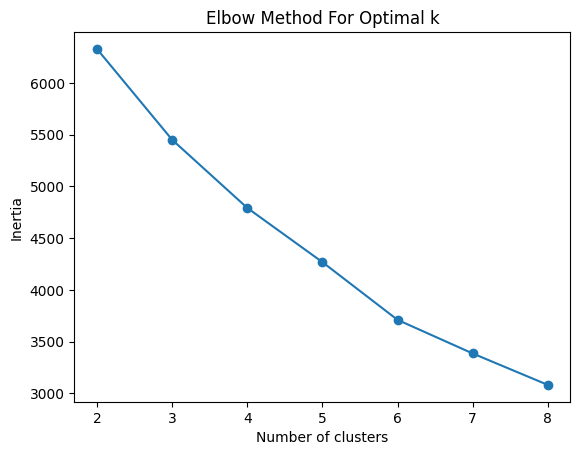

In [65]:
plt.plot(range(2, max_range), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [66]:
kmeans= KMeans(n_clusters = 6)
df["Cluster"]= kmeans.fit_predict(X_scaled)

In [67]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spend,Customer_Since,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,69,0,1617,4895,4
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,72,2,27,4345,5
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,61,0,776,4544,4
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,42,1,53,4371,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,45,1,422,4393,0


In [68]:
df_cluster=df[["Age", "Income", "Total_Spend", "NumWebPurchases", "NumStorePurchases", "Cluster"]]

In [69]:
df_cluster.to_csv("Data/cluster.csv", index=False)

In [70]:
cluster_summary=df.groupby("Cluster")[features].mean().reset_index()
cluster_summary

,Cluster,Age,Income,Total_Spend,NumWebPurchases,NumStorePurchases
0,0,48.093750,68251.250000,1036.940972,5.388889,10.312500
1,1,48.187861,31563.817919,96.033237,2.108382,3.098266
2,2,52.861244,84000.186603,1598.287081,4.688995,6.258373
3,3,71.175084,70901.111111,1155.121212,5.053872,9.569024
4,4,61.182099,57320.407407,739.024691,8.012346,6.308642
5,5,67.741379,42108.142857,156.719212,2.376847,3.810345


In [71]:
df["Cluster"].value_counts()

Cluster
1    692
5    406
4    324
3    297
0    288
2    209
Name: count, dtype: int64

When you have clusters you can specialising marketing campaign

### PCA

In [72]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)
df["PCA1"]= X_pca[:,0]
df["PCA2"]= X_pca[:,1]

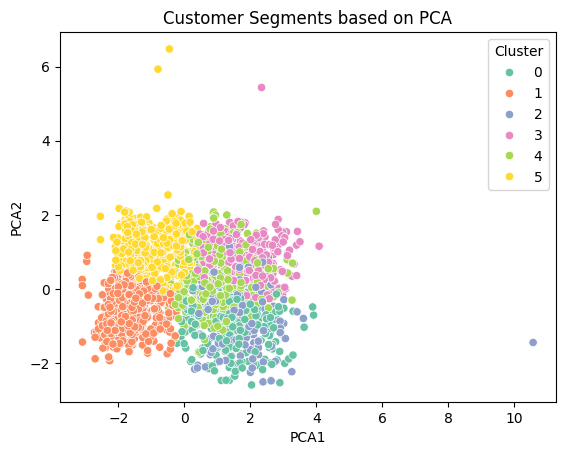

In [73]:
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2")
plt.title("Customer Segments based on PCA")
plt.show()

In [74]:
cluster_summary

,Cluster,Age,Income,Total_Spend,NumWebPurchases,NumStorePurchases
0,0,48.093750,68251.250000,1036.940972,5.388889,10.312500
1,1,48.187861,31563.817919,96.033237,2.108382,3.098266
2,2,52.861244,84000.186603,1598.287081,4.688995,6.258373
3,3,71.175084,70901.111111,1155.121212,5.053872,9.569024
4,4,61.182099,57320.407407,739.024691,8.012346,6.308642
5,5,67.741379,42108.142857,156.719212,2.376847,3.810345


* Cluster 0 – Digital Loyalists: High web activity, solid spending, reliable repeat buyers

* Cluster 1 – Cautious Seniors: Low income and low purchases, price-sensitive

* Cluster 2 – Affluent Store Loyalists: High income, strong in-store purchasing, high value

* Cluster 3 – Premium Omnichannel Shoppers: High income and highest spend across channels

* Cluster 4 – Young Budget Shoppers: Low income, low spend, occasional buyers

* Cluster 5 – Ultra-High-Income Minimalists: Very high income but low engagement

In [75]:
import joblib 
joblib.dump(kmeans, "model/kmeans_model.pkl")
joblib.dump(scaler, "model/scaler.pkl")


['model/scaler.pkl']